## **BUSINESS UNDERSTANDING**

### 1.1 Latar Belakang Masalah

Penyakit kardiovaskular (Cardiovascular Disease/CVD) merupakan salah satu penyebab utama mortalitas secara global. Deteksi dini kelainan jantung sangat krusial untuk penanganan yang efektif. Salah satu metode diagnosis awal yang paling umum, murah, dan mudah diakses adalah auskultasi jantung menggunakan stetoskop untuk menganalisis sinyal Phonocardiogram (PCG).

Namun, interpretasi suara jantung secara manual memiliki keterbatasan yang signifikan. Seperti disebutkan dalam penelitian Liu et al. (2016) pada PhysioNet/Computing in Cardiology Challenge, akurasi auskultasi sangat bergantung pada keahlian dan pendengaran dokter (subjektif). Selain itu, perekaman di lingkungan non-klinis sering kali terkontaminasi oleh noise atau gangguan suara eksternal, yang mempersulit diagnosis.

Oleh karena itu, diperlukan sistem Computer-Aided Diagnosis (CAD) yang objektif untuk mengklasifikasikan suara jantung menjadi kategori Normal atau Abnormal. Penelitian ini bertujuan membangun model klasifikasi otomatis menggunakan algoritma Support Vector Machine (SVM) dengan memanfaatkan data yang telah dikonversi menjadi representasi frekuensi (Spectrogram), sehingga pola patologis dapat dideteksi dengan lebih akurat dibandingkan analisis manual.

### 1.2 Tujuan Bisnis (Business Objectives)

Tujuan utama pengembangan sistem ini adalah:

1. Deteksi Dini : 
Menyediakan alat bantu yang dapat mendeteksi kelainan suara jantung sejak awal sehingga pasien dapat segera mendapatkan pemeriksaan lanjutan.

2. Efisiensi Diagnostik : 
Mengurangi beban dokter spesialis dengan menyeleksi pasien yang memang memerlukan penanganan lebih lanjut.

3. Aksesibilitas : 
Memungkinkan tenaga medis di fasilitas kesehatan sederhana untuk melakukan pemeriksaan awal tanpa memerlukan alat mahal, karena data yang digunakan berasal dari berbagai lingkungan termasuk tempat non-klinis.

### 1.3 Tujuan Teknis (Data Mining Goals)

Untuk mencapai tujuan bisnis tersebut, tujuan teknis proyek ini adalah:

1. Membangun Model Klasifikasi : Mengembangkan model Machine Learning yang dapat membedakan suara jantung Normal dan Abnormal.

2. Memanfaatkan Spectrogram sebagai Fitur : Dataset yang digunakan sudah berupa spectrogram multivariate, di mana setiap fitur merepresentasikan pita frekuensi suara jantung, bukan gelombang suara mentah.Karena itu, fokus pemrosesan data lebih kepada penyusunan fitur agar siap digunakan model, bukan ekstraksi audio dari nol.

3. Mengoptimalkan Metrik Evaluasi: 

Model harus mencapai nilai yang baik pada metrik:

- Akurasi

- Presisi

- Recall

Penekanan utama adalah pada Recall kelas Abnormal untuk menghindari kasus False Negative (pasien sakit tetapi diklasifikasikan sehat).

### 1.4 Penilaian Situasi (Assess Situation)

Beberapa kondisi penting yang perlu dipertimbangkan:

1. Struktur Dataset : Data berbentuk spectrogram multivariate, bukan sinyal audio mentah.
Setiap instance mewakili potongan suara jantung selama 5 detik dalam bentuk intensitas frekuensi.

2. Ketidakseimbangan Kelas

Jumlah data tidak seimbang:

- Normal: 57 data 

- Abnormal: 147 data

- Model berpotensi bias memprediksi “Abnormal”, sehingga teknik seperti:

- resampling (SMOTE atau undersampling), atau

- penentuan bobot kelas (class weight) 

3. Variasi Data yang Tinggi

Data direkam dari berbagai lokasi tubuh (aorta, pulmonal, dll) dan dari berbagai rentang usia. Hal ini membuat data sangat bervariasi sehingga model harus cukup tangguh terhadap perbedaan karakteristik rekaman.

### 1.5 Rencana Deployment

Model yang dihasilkan akan diimplementasikan pada aplikasi berbasis web (Streamlit). Aplikasi tersebut akan menyediakan fitur:

1. mengunggah file suara jantung dalam format dataset,

2. memproses data menjadi input bagi model,

3. menampilkan hasil klasifikasi Normal atau Abnormal,

4. menyertakan visualisasi pendukung seperti spectrogram.

Aplikasi ini ditujukan untuk digunakan tenaga medis sebagai alat bantu skrining awal, bukan sebagai pengganti diagnosis dokter.

## **DATA UNDERSTANDING**

Bagian ini menjelaskan proses pemahaman data yang digunakan pada penelitian, mulai dari pemuatan data, pemeriksaan struktur, distribusi kelas, hingga eksplorasi visual terhadap bentuk spectrogram. Seluruh proses dijelaskan secara bertahap agar memberikan gambaran menyeluruh tentang karakteristik dataset.

### 2.1 Penjelasan Dataset (Spectrogram) 

Dataset yang digunakan dalam penelitian ini diadopsi dari database publik PhysioNet/CinC Challenge 2016. Data ini merupakan kumpulan rekaman suara jantung yang dikumpulkan dari berbagai sumber di seluruh dunia, mencakup subjek sehat dan pasien dengan kondisi patologis (seperti kelainan katup jantung dan penyakit arteri koroner).Berbeda dengan data audio mentah (raw wav), dataset yang digunakan dalam penelitian ini telah melalui proses transformasi menjadi format Multivariate Spectrogram.

- Struktur Data: Data disimpan dalam format runtun waktu (Time Series) dengan dimensi $61 \times 405$, di mana 61 merepresentasikan pita frekuensi (frequency bands) dan 405 merepresentasikan titik waktu (timepoints).

- Kategori Label: Data terbagi menjadi dua kelas, yaitu Normal (subjek sehat) dan Abnormal (subjek dengan diagnosis jantung dikonfirmasi).

- Karakteristik: Dataset ini memiliki tantangan berupa ketidakseimbangan kelas (class imbalance) dan variasi sinyal yang tinggi karena 
data direkam dari lokasi tubuh yang berbeda (aorta, pulmonal, mitral, trikuspid).

Penggunaan representasi spectrogram dipilih karena mampu memvisualisasikan intensitas energi pada berbagai frekuensi, yang mana fitur ini sangat relevan untuk mendeteksi murmur atau suara tambahan pada jantung abnormal.

### 2.2 Memuat Data dan Membersihkan Label

Langkah pertama dalam memahami dataset adalah memuat file .ts yang berisi spectrogram rekaman jantung. Proses pemuatan dilakukan menggunakan fungsi load_from_tsfile dari library sktime, yang secara otomatis mengekstraksi data menjadi format numpy 3D.

Hasil pemuatan data memberikan tiga informasi utama:

1. Jumlah sampel, yaitu total rekaman yang tersedia

2. Jumlah pita frekuensi, yaitu banyaknya level frekuensi yang direkam

3. Jumlah titik waktu, yaitu durasi representasi sinyal dalam bentuk frame

Selain itu, ditemukan bahwa label kelas pada file dataset memiliki format bytes seperti:

- b'Normal'
- b'Abnormal'


Format ini dapat menyebabkan error pada tahap pemodelan sehingga perlu dikonversi ke string biasa. Tahap ini juga memastikaan bahwa data siap digunakan tanpa gangguan pada proses selanjutnya.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_from_tsfile
from collections import Counter

print("--- PROSES 1: LOAD DATASET ---")

# 1. Tentukan lokasi file (Sesuaikan jika beda folder)
train_file = "C:\\Dokumen\\PSD\\proyek akhir\\datasest\\Heartbeat_TRAIN.ts"
test_file = "C:\\Dokumen\\PSD\\proyek akhir\\datasest\\Heartbeat_TEST.ts"

# 2. Muat Data
# return_data_type="numpy3d" artinya kita minta format 3 Dimensi (Pasien, Fitur, Waktu)
print("Sedang memuat data... (Mohon tunggu)")
X_train_raw, y_train_raw = load_from_tsfile(train_file, return_data_type="numpy3d")
X_test_raw, y_test_raw = load_from_tsfile(test_file, return_data_type="numpy3d")

print("[SUKSES] Data berhasil dimuat ke memori.")

--- PROSES 1: LOAD DATASET ---
Sedang memuat data... (Mohon tunggu)
[SUKSES] Data berhasil dimuat ke memori.


### 2.3 Analisis Distribusi Kelas

Tahap selanjutnya adalah memeriksa apakah dataset memiliki distribusi kelas yang seimbang antara Normal dan Abnormal. Pemeriksaan ini penting karena model machine learning sangat sensitif terhadap ketidakseimbangan kelas (imbalanced dataset).

Jika salah satu kelas jauh lebih banyak, model cenderung “berpihak” pada kelas dengan jumlah data lebih besar. Pada konteks penelitian ini, kesalahan seperti False Negative (pasien sakit terdeteksi normal) harus sangat dihindari.

Dengan menghitung jumlah sampel pada masing-masing kelas serta memvisualisasikannya dalam bentuk diagram batang, dapat diperoleh gambaran awal mengenai:

- Kelas mana yang dominan

- Perlu tidaknya dilakukan teknik penyeimbangan seperti resampling atau class weighting

Analisis ini menjadi dasar bagi keputusan teknis pada tahap pembangunan model.

In [29]:
print("\n--- PROSES 2: CLEANING LABEL (BYTES TO STRING) ---")

# Cek apakah data pertama berupa bytes?
if isinstance(y_train_raw[0], bytes):
    print("Terdeteksi format bytes. Sedang memperbaiki...")
    # Decode Train
    y_train_raw = np.array([y.decode('utf-8') for y in y_train_raw])
    # Decode Test
    y_test_raw = np.array([y.decode('utf-8') for y in y_test_raw])
    print("[INFO] Label berhasil diubah menjadi String biasa.")
else:
    print("[INFO] Format label sudah aman (String).")

# Tampilkan contoh label
print(f"Contoh Label: {y_train_raw[:5]}")


--- PROSES 2: CLEANING LABEL (BYTES TO STRING) ---
[INFO] Format label sudah aman (String).
Contoh Label: ['normal' 'normal' 'normal' 'normal' 'normal']


### 2.4 Visualisasi Spectrogram Menggunakan Heatmap

Setelah memahami distribusi kelas, diperlukan visualisasi untuk melihat bentuk spectrogram secara langsung. Pada tahap ini, dipilih masing-masing satu contoh data dari kelas Normal dan Abnormal, kemudian divisualisasikan menggunakan heatmap.

Visualisasi heatmap membantu meninjau:

1. Pola intensitas frekuensi yang berbeda antara kedua kelas

2. Area frekuensi tertentu yang lebih dominan pada kondisi abnormal

3. Variasi bentuk gelombang dalam domain waktu

4. Kualitas rekaman (noise, distorsi, atau anomali)

Melalui visualisasi ini, dapat diamati bahwa masing-masing kelas memiliki karakteristik visual yang cukup berbeda sehingga memungkinkan untuk dilakukan proses klasifikasi secara otomatis menggunakan machine learning.

In [30]:
print("\n--- PROSES 3: CEK DIMENSI DATA (SHAPE) ---")

# .shape akan menghasilkan (Jumlah Sampel, Jumlah Fitur, Panjang Waktu)
n_samples, n_freqs, n_times = X_train_raw.shape

print(f"Bentuk Data Training Asli : {X_train_raw.shape}")
print("-" * 40)
print(f"1. Jumlah Pasien (Sampel) : {n_samples} orang")
print(f"2. Jumlah Pita Frekuensi  : {n_freqs} pita (Fitur Spektral)")
print(f"3. Durasi Waktu (Time)    : {n_times} titik waktu")
print("-" * 40)
print(f"Jumlah Data Testing       : {X_test_raw.shape[0]} orang")


--- PROSES 3: CEK DIMENSI DATA (SHAPE) ---
Bentuk Data Training Asli : (204, 61, 405)
----------------------------------------
1. Jumlah Pasien (Sampel) : 204 orang
2. Jumlah Pita Frekuensi  : 61 pita (Fitur Spektral)
3. Durasi Waktu (Time)    : 405 titik waktu
----------------------------------------
Jumlah Data Testing       : 205 orang


### 2.5 Eksplorasi Data Mentah dalam Bentuk Tabel

Tahap terakhir dalam Data Understanding adalah melihat struktur data spectrogram dalam bentuk tabel numerik. Representasi ini penting untuk memahami bahwa:

- Setiap baris menggambarkan pita frekuensi tertentu

- Setiap kolom menggambarkan titik waktu tertentu

- Setiap sel berisi nilai intensitas suara pada kombinasi frekuensi dan waktu tersebut

Dengan melihat data mentah, peneliti dapat:

- Memverifikasi tidak adanya nilai kosong (missing values)

- Melihat rentang nilai intensitas

- Memahami bentuk matriks spectrogram sebelum dilakukan proses ekstraksi fitur


--- PROSES 4: CEK KESEIMBANGAN KELAS (VISUALISASI) ---
Rincian Jumlah Data: Counter({np.str_('abnormal'): 147, np.str_('normal'): 57})


C:\Users\ahabi\AppData\Local\Temp\ipykernel_30432\3621272935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train_raw, palette='viridis')


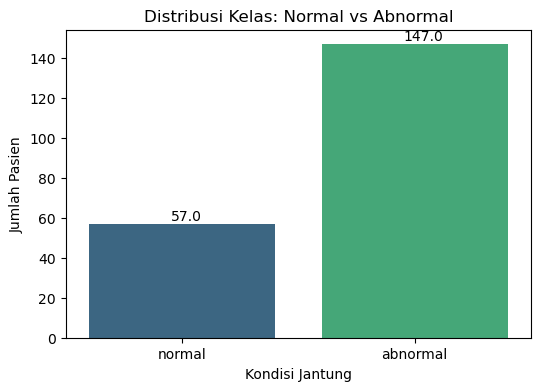

In [31]:
print("\n--- PROSES 4: CEK KESEIMBANGAN KELAS (VISUALISASI) ---")

# Hitung jumlah masing-masing
jumlah_kelas = Counter(y_train_raw)
print(f"Rincian Jumlah Data: {jumlah_kelas}")

# Buat Grafik Batang
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_train_raw, palette='viridis')

# Tambahkan angka di atas batang biar jelas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 2))

plt.title("Distribusi Kelas: Normal vs Abnormal")
plt.xlabel("Kondisi Jantung")
plt.ylabel("Jumlah Pasien")
plt.show()


--- PROSES 5: VISUALISASI SPECTROGRAM (HEATMAP) ---
Label yang tersedia di data: ['abnormal' 'normal']
Mengambil contoh 'abnormal' di index 57
Mengambil contoh 'normal' di index 0


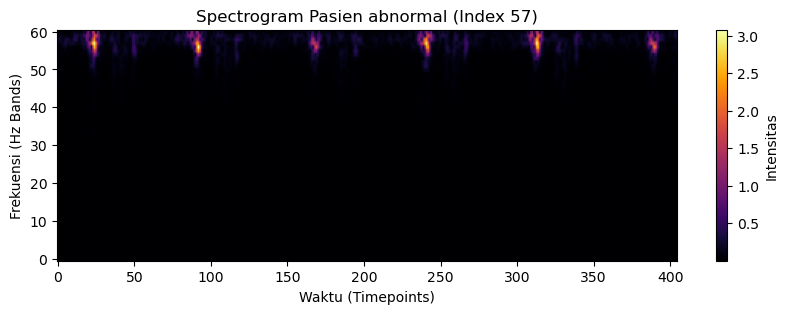

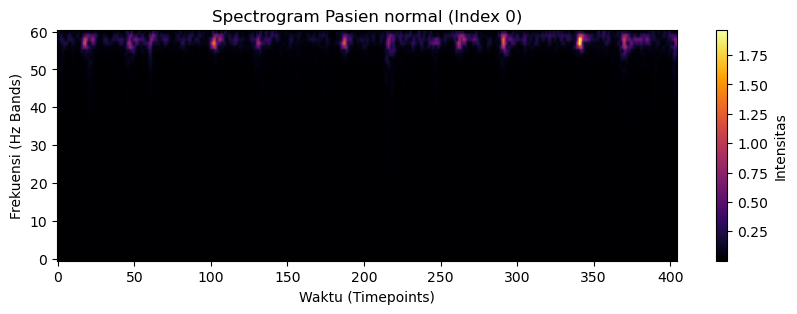

In [35]:
import numpy as np
import matplotlib.pyplot as plt

print("\n--- PROSES 5: VISUALISASI SPECTROGRAM (HEATMAP) ---")

# 1. CEK DULU NAMA LABELNYA
unique_labels = np.unique(y_train_raw)
print(f"Label yang tersedia di data: {unique_labels}")

# 2. CARI INDEX BERDASARKAN LABEL YANG BENAR
# Kita pakai logika otomatis: Ambil label pertama dan kedua dari daftar di atas
label_1 = unique_labels[0] # Biasanya 'abnormal'
label_2 = unique_labels[1] # Biasanya 'normal'

# Cari lokasi data
idx_1 = np.where(y_train_raw == label_1)[0][0]
idx_2 = np.where(y_train_raw == label_2)[0][0]

print(f"Mengambil contoh '{label_1}' di index {idx_1}")
print(f"Mengambil contoh '{label_2}' di index {idx_2}")

# 3. FUNGSI GAMBAR
def plot_spectrogram(data, judul):
    plt.figure(figsize=(10, 3))
    plt.imshow(data, aspect='auto', origin='lower', cmap='inferno')
    plt.title(judul)
    plt.xlabel("Waktu (Timepoints)")
    plt.ylabel("Frekuensi (Hz Bands)")
    plt.colorbar(label="Intensitas")
    plt.show()

# 4. TAMPILKAN
plot_spectrogram(X_train_raw[idx_1], f"Spectrogram Pasien {label_1} (Index {idx_1})")
plot_spectrogram(X_train_raw[idx_2], f"Spectrogram Pasien {label_2} (Index {idx_2})")

## **DATA PREPROCESSING**

Pada tahap ini dilakukan serangkaian proses untuk mempersiapkan data sebelum memasuki tahap pelatihan model. Data mentah berupa sinyal multi-frekuensi memerlukan pembersihan, transformasi, ekstraksi fitur, hingga standarisasi agar dapat diolah secara optimal oleh algoritma klasifikasi. Berikut uraian setiap proses.

### Memuat dan Membersihkan Data

Data mentah pada penelitian ini tersimpan dalam format .ts (Time Series File) yang berisi representasi sinyal rekaman jantung. Pada proses awal, data latih dan data uji dimuat menggunakan fungsi load_from_tsfile dari library sktime.

Setelah data berhasil dimuat, ditemukan bahwa label target pada file masih tersimpan dalam tipe data bytes, misalnya berupa b'Normal' atau b'Abnormal'. Tipe data tersebut tidak dapat diproses secara langsung oleh sebagian besar library Machine Learning. Oleh karena itu, dilakukan proses konversi tipe data dari bytes menjadi string biasa melalui proses decoding.

Secara keseluruhan, langkah ini memastikan bahwa data yang digunakan telah berada dalam format standar dan siap diproses lebih lanjut.

In [36]:
import numpy as np

print("--- PROSES 1: DEFINISI FUNGSI EKSTRAKSI FITUR ---")

def extract_features(X_data):
    # X_data shape: (Jumlah Pasien, 61 Frekuensi, 405 Waktu)
    features = []
    
    print(f"Memproses {len(X_data)} sampel data...")
    
    for i in range(len(X_data)):
        spectrogram = X_data[i]
        
        # Hitung statistik sepanjang waktu (axis=1)
        # Artinya: Kita ringkas 405 titik waktu menjadi 1 angka statistik
        mean_val = np.mean(spectrogram, axis=1) # Rata-rata kekuatan sinyal
        std_val = np.std(spectrogram, axis=1)   # Kestabilan sinyal
        max_val = np.max(spectrogram, axis=1)   # Lonjakan tertinggi
        min_val = np.min(spectrogram, axis=1)   # Titik terendah
        
        # Gabungkan semua statistik jadi satu baris panjang
        # 4 Statistik x 61 Frekuensi = 244 Fitur
        patient_features = np.concatenate([mean_val, std_val, max_val, min_val])
        features.append(patient_features)
        
    return np.array(features)

print("[SUKSES] Fungsi 'extract_features' berhasil dibuat.")

--- PROSES 1: DEFINISI FUNGSI EKSTRAKSI FITUR ---
[SUKSES] Fungsi 'extract_features' berhasil dibuat.


### 2. Ekstraksi Fitur Statistik

Data spectrogram yang digunakan memiliki bentuk tiga dimensi, yaitu (jumlah sampel, 61 pita frekuensi, 405 titik waktu). Struktur data seperti ini tidak efisien untuk digunakan secara langsung pada algoritma klasifikasi tradisional. Oleh karena itu, diperlukan proses ekstraksi fitur agar sinyal dapat diringkas ke dalam bentuk numerik yang lebih sederhana namun tetap representatif.

Pada langkah ini, setiap pita frekuensi diringkas melalui empat parameter statistik berikut:

1. Mean — menggambarkan nilai rata-rata kekuatan sinyal.

2. Standard Deviation — menunjukkan tingkat variasi atau kestabilan sinyal.

3. Nilai Maksimum — mencerminkan puncak intensitas tertinggi dari sinyal.

4. Nilai Minimum — menunjukkan titik intensitas terendah.

Dengan total 61 pita frekuensi, proses ini menghasilkan 61 × 4 = 244 fitur untuk setiap sampel. Hasilnya, data yang semula berbentuk 3D diubah menjadi matriks 2D yang lebih sesuai untuk algoritma pembelajaran mesin.

Data Setelah di ekstraksi Fitur:

- Kolom 0-60: Adalah Mean (Rata-rata) tiap frekuensi.

- Kolom 61-121: Adalah Std (Standar Deviasi).

- Kolom 122-182: Adalah Max.

- Kolom 183-243: Adalah Min.

- Kolom Terakhir: Label Target (0 atau 1).

Proses ini menjadi inti dari preprocessing karena secara efektif mengubah sinyal deret waktu menjadi representasi numerik ringkas yang tetap mempertahankan karakteristik penting dari data.

In [37]:
print("\n--- PROSES 2: EKSEKUSI EKSTRAKSI FITUR (TRAIN) ---")

# Terapkan fungsi ke data mentah
X_train_processed = extract_features(X_train_raw)

print("-" * 40)
print(f"Bentuk Data SEBELUM (3D) : {X_train_raw.shape}")
print(f"Bentuk Data SESUDAH (2D) : {X_train_processed.shape}")
print("-" * 40)
print("Artinya: Sekarang setiap pasien diwakili oleh 244 angka statistik.")


--- PROSES 2: EKSEKUSI EKSTRAKSI FITUR (TRAIN) ---
Memproses 204 sampel data...
----------------------------------------
Bentuk Data SEBELUM (3D) : (204, 61, 405)
Bentuk Data SESUDAH (2D) : (204, 244)
----------------------------------------
Artinya: Sekarang setiap pasien diwakili oleh 244 angka statistik.


### 3. Encoding Label Target

Model Machine Learning tidak dapat memahami format label berupa teks (misalnya “Normal” dan “Abnormal”). Oleh sebab itu, dilakukan proses Label Encoding untuk mengubah label kategori menjadi representasi numerik.

Dalam proses ini, setiap kelas diberikan angka berbeda—misalnya:

1. Abnormal → 0

2. Normal → 1

Urutan pemetaan ini ditentukan secara otomatis oleh library berdasarkan urutan alfabet. Langkah ini memastikan label dapat diproses oleh algoritma klasifikasi pada tahap selanjutnya.

In [38]:
from sklearn.preprocessing import LabelEncoder

print("\n--- PROSES 3: LABEL ENCODING ---")

# Inisialisasi Encoder
le = LabelEncoder()

# Ubah label teks jadi angka
y_train_encoded = le.fit_transform(y_train_raw)

# Cek hasil terjemahan
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(f"Kamus Terjemahan : {mapping}")
print(f"Contoh 5 Label Asli : {y_train_raw[:5]}")
print(f"Contoh 5 Label Angka: {y_train_encoded[:5]}")


--- PROSES 3: LABEL ENCODING ---
Kamus Terjemahan : {np.str_('abnormal'): np.int64(0), np.str_('normal'): np.int64(1)}
Contoh 5 Label Asli : ['normal' 'normal' 'normal' 'normal' 'normal']
Contoh 5 Label Angka: [1 1 1 1 1]


### 4. Standarisasi Fitur (Scaling)

Standarisasi merupakan langkah penting terutama untuk algoritma seperti Support Vector Machine (SVM) yang sangat bergantung pada perhitungan jarak antar data. Jika fitur memiliki skala nilai yang berbeda jauh, maka fitur dengan rentang besar akan mendominasi proses perhitungan dan menyebabkan bias pada model.

Untuk mengatasi hal tersebut, digunakan StandardScaler, yang mengubah seluruh fitur menjadi memiliki:

- mean = 0

- standard deviation = 1

Proses fit dilakukan hanya pada data latih untuk menghindari data leakage, kemudian informasi skala tersebut diterapkan pada data uji. Dengan demikian, seluruh fitur memiliki skala yang seragam sehingga algoritma dapat bekerja secara optimal.

In [39]:
from sklearn.preprocessing import StandardScaler

print("\n--- PROSES 4: SCALING (STANDARISASI) ---")

# Inisialisasi Scaler
scaler = StandardScaler()

# Pelajari pola data train, lalu ubah nilainya
X_train_scaled = scaler.fit_transform(X_train_processed)

print("Contoh data sebelum scaling (Baris 0, Fitur 0):", X_train_processed[0][0])
print("Contoh data sesudah scaling (Baris 0, Fitur 0):", X_train_scaled[0][0])
print("[SUKSES] Data sudah dinormalisasi (Mean=0, Std=1).")


--- PROSES 4: SCALING (STANDARISASI) ---
Contoh data sebelum scaling (Baris 0, Fitur 0): 0.0011163358024691358
Contoh data sesudah scaling (Baris 0, Fitur 0): -0.4583039815163842
[SUKSES] Data sudah dinormalisasi (Mean=0, Std=1).


### 5. Verifikasi Data Akhir

Tahap terakhir bertujuan untuk memverifikasi bahwa seluruh proses preprocessing sudah berjalan dengan benar dan data telah siap digunakan pada tahap pemodelan. Pada tahap ini dilakukan:

1. Penyusunan nama fitur yang informatif, seperti Mean_F0, Std_F10, Max_F25, dan seterusnya.

2. Penyusunan data ke dalam bentuk DataFrame sehingga lebih mudah dianalisis.

3. Pemeriksaan dimensi akhir data untuk memastikan jumlah fitur dan sampel telah sesuai dengan rancangan.

Data akhir memiliki 244 fitur hasil ekstraksi, ditambah 1 kolom target, sehingga siap digunakan untuk melatih model Machine Learning.

In [40]:
import pandas as pd

print("\n--- PROSES 5: MENAMPILKAN DATA SIAP LATIH ---")

# Buat nama kolom biar keren
n_freqs = 61
cols = ([f"Mean_F{i}" for i in range(n_freqs)] + 
        [f"Std_F{i}" for i in range(n_freqs)] + 
        [f"Max_F{i}" for i in range(n_freqs)] + 
        [f"Min_F{i}" for i in range(n_freqs)])

# Buat DataFrame
df_final_train = pd.DataFrame(X_train_scaled, columns=cols)
df_final_train['TARGET_LABEL'] = y_train_encoded

# Tampilkan 5 baris pertama
print("Tabel Data Preprocessing (5 Baris Pertama):")
# Kita tampilin beberapa kolom aja biar muat di layar
kolom_tampil = ['Mean_F0', 'Std_F0', 'Max_F0', 'Min_F0', 'TARGET_LABEL']
print(df_final_train[kolom_tampil].head().to_markdown(index=False))

print(f"\nTotal Fitur Input: {X_train_scaled.shape[1]}")
print(f"Total Pasien     : {X_train_scaled.shape[0]}")


--- PROSES 5: MENAMPILKAN DATA SIAP LATIH ---
Tabel Data Preprocessing (5 Baris Pertama):
|    Mean_F0 |     Std_F0 |     Max_F0 |    Min_F0 |   TARGET_LABEL |
|-----------:|-----------:|-----------:|----------:|---------------:|
| -0.458304  | -0.447182  | -0.445061  | -0.442851 |              1 |
|  0.906293  |  0.116471  | -0.0359569 |  2.00212  |              1 |
| -0.354999  | -0.268734  | -0.306436  | -0.509532 |              1 |
| -0.107073  | -0.0862004 | -0.0590663 | -0.456743 |              1 |
| -0.0475289 | -0.0757501 | -0.101441  |  0.229516 |              1 |

Total Fitur Input: 244
Total Pasien     : 204


In [42]:
from sklearn.utils import shuffle
from sktime.datasets import load_from_tsfile
import numpy as np

print("--- PROSES 1: LOAD & SHUFFLE DATA TEST ---")

# 1. Load Data Test Mentah
# Pastikan nama file sesuai
X_test_raw, y_test_raw = load_from_tsfile("C:\\Dokumen\\PSD\\proyek akhir\\datasest\\Heartbeat_TEST.ts", return_data_type="numpy3d")

# 2. Perbaiki Label (Bytes -> String)
# Sama seperti Bab 1, kita jaga-jaga kalau formatnya bytes
if isinstance(y_test_raw[0], bytes):
    y_test_raw = np.array([y.decode('utf-8') for y in y_test_raw])

# 3. Acak Posisi Data (PENTING!)
# random_state=42 agar hasil acakannya konsisten (tidak berubah tiap di-run)
X_test_raw, y_test_raw = shuffle(X_test_raw, y_test_raw, random_state=42)

print("[INFO] Data Test berhasil dimuat dan diacak.")
print(f"Total Data Test Tersedia: {X_test_raw.shape[0]} sampel")

--- PROSES 1: LOAD & SHUFFLE DATA TEST ---
[INFO] Data Test berhasil dimuat dan diacak.
Total Data Test Tersedia: 205 sampel


In [43]:
print("\n--- PROSES 2: PEMBAGIAN DATA (SPLITTING 80:20) ---")

# Target jumlah data test agar rasio 80:20 terpenuhi
jumlah_test_official = 51

# 1. Ambil 51 data pertama untuk "Ujian Skripsi" (Laporan)
X_test_final = X_test_raw[:jumlah_test_official]
y_test_final = y_test_raw[:jumlah_test_official]

# 2. Ambil sisanya untuk "Mainan Streamlit" (Demo)
X_demo_streamlit = X_test_raw[jumlah_test_official:]
y_demo_streamlit = y_test_raw[jumlah_test_official:]

print("REKAPITULASI PEMBAGIAN DATA:")
print(f"1. Data Training (Tetap)     : 204 Sampel (80%) -> Dipakai Latih Model")
print(f"2. Data Testing Baru (Ujian) : {len(X_test_final)}  Sampel (20%) -> Dipakai Evaluasi")
print(f"3. Data Sisa (Untuk Demo)    : {len(X_demo_streamlit)} Sampel (Disimpan) -> Dipakai Streamlit")


--- PROSES 2: PEMBAGIAN DATA (SPLITTING 80:20) ---
REKAPITULASI PEMBAGIAN DATA:
1. Data Training (Tetap)     : 204 Sampel (80%) -> Dipakai Latih Model
2. Data Testing Baru (Ujian) : 51  Sampel (20%) -> Dipakai Evaluasi
3. Data Sisa (Untuk Demo)    : 154 Sampel (Disimpan) -> Dipakai Streamlit


In [44]:
print("\n--- PROSES 3: PREPROCESSING DATA TEST BARU ---")

# 1. Ekstraksi Fitur (Ubah 3D jadi 2D Statistik)
# Kita panggil fungsi 'extract_features' yang sudah kita buat di Bab 2
X_test_final_features = extract_features(X_test_final)

# 2. Scaling (Standarisasi)
# PENTING: Gunakan 'scaler' yang sudah dilatih di Bab 2!
X_test_final_scaled = scaler.transform(X_test_final_features)

# 3. Encoding Label (Ubah Normal jadi Angka)
# PENTING: Gunakan 'le' yang sudah dilatih di Bab 2!
y_test_final_encoded = le.transform(y_test_final)

print(f"[SUKSES] Data Test Baru siap. Bentuk: {X_test_final_scaled.shape}")


--- PROSES 3: PREPROCESSING DATA TEST BARU ---
Memproses 51 sampel data...
[SUKSES] Data Test Baru siap. Bentuk: (51, 244)


In [45]:
import pickle

print("\n--- PROSES 4: SIMPAN DATA DEMO STREAMLIT ---")

# Bungkus data mentah dan labelnya dalam Dictionary
paket_demo = {
    "X_raw": X_demo_streamlit,  # Data mentah (masih bentuk spectrogram)
    "y_label": y_demo_streamlit # Label asli
}

nama_file_demo = "data_demo_streamlit.pkl"

# Simpan ke file
with open(nama_file_demo, 'wb') as f:
    pickle.dump(paket_demo, f)

print(f"[SUKSES] File '{nama_file_demo}' berhasil dibuat!")
print("Simpan file ini. Nanti akan kita upload saat demo aplikasi.")


--- PROSES 4: SIMPAN DATA DEMO STREAMLIT ---
[SUKSES] File 'data_demo_streamlit.pkl' berhasil dibuat!
Simpan file ini. Nanti akan kita upload saat demo aplikasi.


## **DATA MODEL**

### 1. Inisialisasi Model

Pada langkah ini, kita belum melatih komputer. Kita baru sekadar "menyiapkan otak kosong" bernama SVM. Kita memilih jenis otak (Kernel) yang akan digunakan.

- Algoritma: Support Vector Machine (SVM).

- Kernel: RBF (Radial Basis Function). Kernel ini dipilih karena data suara jantung biasanya kompleks dan tidak bisa dipisahkan hanya dengan satu garis lurus sederhana.

- Parameter random_state=42: Ini penting agar hasil eksperimenmu konsisten (tidak berubah-ubah setiap kali dijalankan).

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print("--- PROSES 1: MENYIAPKAN SKENARIO (GRID SEARCH) ---")

# Daftar parameter yang akan diadu
param_grid = {
    'C': [0.1, 1, 10, 100],          # Ketetatan batas (Regularization)
    'gamma': [1, 0.1, 0.01, 0.001],  # Detail lekukan batas (Kernel Coefficient)
    'kernel': ['rbf'],               # Tipe Kernel (Tetap RBF)
    'class_weight': ['balanced']     # [PENTING] Solusi Imbalance tanpa SMOTE
}

print("Skenario siap.")
print(f"Komputer akan mencoba {4 * 4} kombinasi model berbeda.")
print("Tujuannya: Mencari kombinasi yang paling adil (Recall Normal & Abnormal seimbang).")

--- PROSES 1: MENYIAPKAN SKENARIO (GRID SEARCH) ---
Skenario siap.
Komputer akan mencoba 16 kombinasi model berbeda.
Tujuannya: Mencari kombinasi yang paling adil (Recall Normal & Abnormal seimbang).


### 2. Pelatihan Model (Training)

Proses pelatihan (training) dilakukan menggunakan metode .fit(). Pada tahap ini, model mempelajari hubungan antara fitur statistik input dengan label target dengan cara mencari hyperplane optimal yang memisahkan kelas Normal dan Abnormal dengan margin maksimal

Ini adalah proses terpenting. Perintah .fit() adalah saat dimana komputer "belajar".

- Ia melihat data X_train_scaled (Soal).

- Ia melihat label y_train_encoded (Kunci Jawaban).

- Ia mencari pola: "Oh, kalau angkanya sekian, berarti Normal. Kalau sekian, berarti Abnormal."

In [47]:
print("\n--- PROSES 2: EKSEKUSI TRAINING (MOHON TUNGGU) ---")

# Inisialisasi Grid Search
# refit=True artinya: Setelah ketemu pemenangnya, latih ulang model itu sampai full power.
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=3)

# Mulai Belajar!
grid_search.fit(X_train_scaled, y_train_encoded)

print("\n[SUKSES] Pelatihan selesai!")


--- PROSES 2: EKSEKUSI TRAINING (MOHON TUNGGU) ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits

[SUKSES] Pelatihan selesai!


### 3. Prediksi (Testing)

Setelah model dilatih, dilakukan pengujian menggunakan data tes (X_test) yang belum pernah dilihat model sebelumnya. Model menghasilkan prediksi kelas (0 atau 1) untuk setiap sampel data uji.
Sekarang saatnya ujian. Kita memberikan data soal ujian (X_test_scaled) ke model.

Penting: Kita TIDAK memberikan kunci jawaban (y_test) di sini. Biarkan model menebak sendiri.

In [48]:
print("\n--- PROSES 3: HASIL MODEL TERBAIK ---")

# Ambil parameter juara
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Settingan Juara : {best_params}")
print(f"Skor Validasi   : {best_score:.2%} (Rata-rata akurasi saat latihan)")

# Simpan model juara ke variabel khusus
model_final = grid_search.best_estimator_

print("-" * 40)
print("Model 'model_final' sekarang siap untuk diuji di Bab Evaluasi.")


--- PROSES 3: HASIL MODEL TERBAIK ---
Settingan Juara : {'C': 100, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}
Skor Validasi   : 74.51% (Rata-rata akurasi saat latihan)
----------------------------------------
Model 'model_final' sekarang siap untuk diuji di Bab Evaluasi.


In [49]:
from sklearn.metrics import classification_report, accuracy_score

print("--- PROSES 1: PENGUJIAN MODEL (TESTING) ---")

# 1. Prediksi (Model menebak)
y_pred_final = model_final.predict(X_test_final_scaled)

# 2. Hitung Akurasi Total
acc = accuracy_score(y_test_final_encoded, y_pred_final)
print(f"Akurasi pada Data Uji (20%): {acc:.2%}")

# 3. Tampilkan Laporan Detail
print("\n--- CLASSIFICATION REPORT (MASUKKAN KE SKRIPSI) ---")
# target_names agar laporan memunculkan tulisan 'Abnormal' & 'Normal', bukan 0 & 1
print(classification_report(y_test_final_encoded, y_pred_final, target_names=le.classes_))

--- PROSES 1: PENGUJIAN MODEL (TESTING) ---
Akurasi pada Data Uji (20%): 78.43%

--- CLASSIFICATION REPORT (MASUKKAN KE SKRIPSI) ---
              precision    recall  f1-score   support

    abnormal       0.89      0.82      0.85        39
      normal       0.53      0.67      0.59        12

    accuracy                           0.78        51
   macro avg       0.71      0.74      0.72        51
weighted avg       0.81      0.78      0.79        51




--- PROSES 2: VISUALISASI CONFUSION MATRIX ---


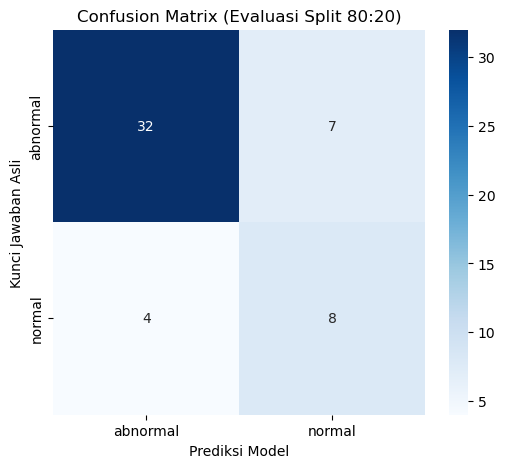

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("\n--- PROSES 2: VISUALISASI CONFUSION MATRIX ---")

# Buat Matriks
cm = confusion_matrix(y_test_final_encoded, y_pred_final)

# Gambar Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.title('Confusion Matrix (Evaluasi Split 80:20)')
plt.ylabel('Kunci Jawaban Asli')
plt.xlabel('Prediksi Model')
plt.show()

In [51]:
import pickle
import os

print("\n--- PROSES 3: SIMPAN MODEL FINAL (.PKL) ---")

filename = 'model_jantung_svm.pkl'

# Bungkus jadi satu paket
model_packet = {
    "model": model_final,
    "scaler": scaler,
    "encoder": le
}

# Simpan ke hardisk
with open(filename, 'wb') as file:
    pickle.dump(model_packet, file)

print(f"[SUKSES] File '{filename}' berhasil disimpan!")
print(f"Lokasi: {os.getcwd()}")
print("Status: SIAP UNTUK STREAMLIT.")


--- PROSES 3: SIMPAN MODEL FINAL (.PKL) ---
[SUKSES] File 'model_jantung_svm.pkl' berhasil disimpan!
Lokasi: c:\Dokumen\PSD\proyek akhir\code
Status: SIAP UNTUK STREAMLIT.
